## 画像のよくある前処理

In [1]:
import torch
import torchvision
import numpy as np
from PIL import Image

## sample画像

In [2]:
im = Image.open('Lenna.jpg')

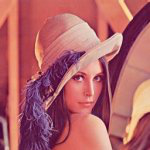

In [3]:
im

## 幾何的な変形
  - 水平方法反転
  - 垂直方法反転
  - 平行移動
  - 回転
  - サイズ変更
  - ノイズ?(geometric)
  - Random Crop(画像切り出し

In [12]:
# 水平
hflip = torchvision.transforms.RandomHorizontalFlip(p=1)

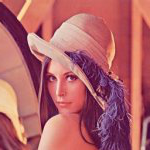

In [13]:
hflip(im)

### なぜPILのみ

In [14]:
hflip(np.array(im))

TypeError: img should be PIL Image. Got <class 'numpy.ndarray'>

In [10]:
# 垂直反転

In [18]:
vflip = torchvision.transforms.RandomVerticalFlip(p=1)

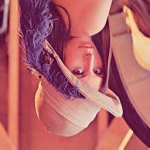

In [19]:
vflip(im)

## 平行移動/回転
- angle: 回転の角度(重心中心に回転?)
- translate: 平行移動の量
- scale: 拡大縮小
- shear: 回転の角度(正方形の一番長い部分にあうように調整)

In [20]:
affine = torchvision.transforms.functional.affine

- 平行移動

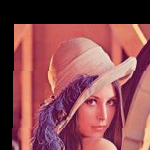

In [25]:
affine(im, angle=0, translate=[13, 24], scale = 1.0, shear=1)

- 回転

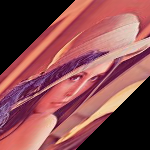

In [30]:
affine(im, angle=0, translate=[0, 0], scale = 1.0, shear=45)

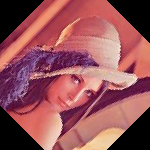

In [31]:
affine(im, angle=45, translate=[0, 0], scale = 1.0, shear=0)

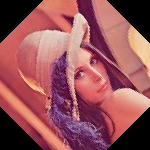

In [36]:
rotate = torchvision.transforms.functional.rotate
rotate(im, 45)

- サイズ変更
  - reshape
  - サイズ変更せず、一部切り取り

In [45]:
resize = torchvision.transforms.Resize([300, 240])

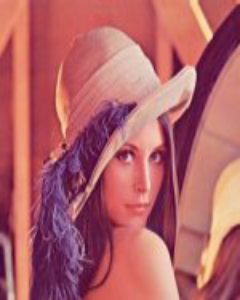

In [46]:
resize(im)

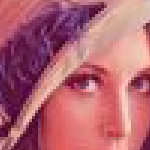

In [48]:
affine(im, angle=0, translate=[0, 0], scale = 3.0, shear=0)

- random切り出し

In [57]:
randomcrop = torchvision.transforms.RandomCrop([100, 100])

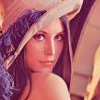

In [58]:
randomcrop(im)

## Color Space Transformation

## subtract mean

In [83]:
# 入力画像からチャンネルの平均を抜く
def SubtraceMeans(im):
    _im = np.array(im)
    _im = _im - _im.mean((0,1))
    # uint8で変換しないとエラーになる
    return Image.fromarray(np.uint8(_im))

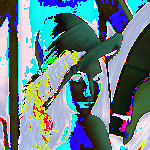

In [81]:
Image.fromarray(np.uint8(_im))

グレースケール化

In [84]:
to_gray = torchvision.transforms.Grayscale(num_output_channels=1)

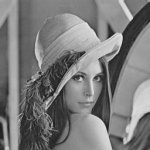

In [85]:
to_gray(im)

In [139]:
class Cutout:
    """
    画像をランダムにマスクする
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        """
        Args:
            img: PIL.Image
        Returns:
            Tensor: PIL.Image
        """
        h = img.size[0]
        w = img.size[1]

        mask = np.ones((h, w), np.float32)

        for n in range(self.n_holes):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            mask[y1: y2, x1: x2] = 0.


        img = np.array(img)
        img[:,:,0] = img[:, :, 0] * mask
        img[:,:,1] = img[:, :, 1] * mask
        img[:,:,2] = img[:, :, 2] * mask


        return Image.fromarray(np.uint8(img))

In [141]:
cutout = Cutout(3, 20)

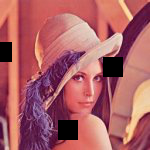

In [142]:
cutout(im)